# Final Test for Practical Programming PA 7081

Due January 10th 2022 at 12:00. 

## This is individual assignment. Submit your work via Blackboard as 'id.ipynb' file, where 'id' is your University user id (e.g., for me it is sn85).

# DO NOT USE any file compression method. 


While the tasks below mention magnetic fields and particle orbits, you do not need to know any physics to do this test, which only examines your Python programming skills. Problem 3 is optional and I expect it to be attempted by the strongest students only.



### Problem 1  (15 marks): Reading and plotting data from a file.


Read in the contents of the file 'rev26_27.dat' into a RecArray.  This is a data file containing a spacecraft called Cassini's magnetometer measurements from two orbits around Saturn in 2007. The columns are day-of-year since 2004, and three field components in spherical polar coordinates ($B_r$, $B_\theta$, $B_\varphi$). Make the following plot:
 
 
* Plot using red pixel points $B_r$ versus day of year since 2004.  
* Limit the time (date) axis to between 940 to 950 days, and the $y$ axis to between -3 to 4. 
* Label the axes appropriately and add a title and a legend.  
* Add a dotted green horizontal line at $B_r=0$.  
* Finally, plot a linear regression (line of best linear fit) in blue, and print the coefficients of the fit.



Problem 1

Number of data entries = 34504
Number of data entries after removing NaN values of Day and Br = 32597



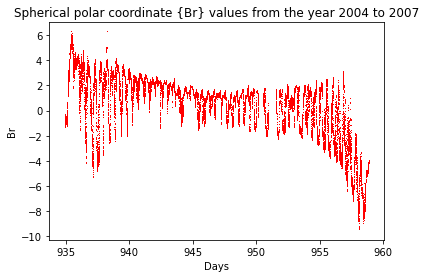

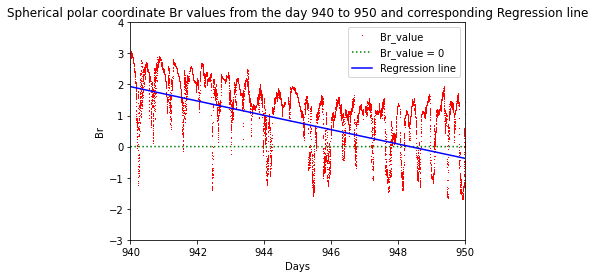

Coefficients of the fitted line are : slope = -0.2310, intercept = 219.1060


In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

#read the data
datafile = 'rev26_27.dat'
data = np.recfromtxt(datafile,names=[('Day'), ('Br'), ('𝐵𝜃 '), ('𝐵𝜑')])

#creating new array with values of Day and Br, Removing nan values of Days and Br
print("Number of data entries = {}".format(len(data)))
scdata = np.array(list(zip(data.Day, data.Br)))
scdata = scdata[~np.isnan(scdata).any(axis=1)]
print("Number of data entries after removing NaN values of Day and Br = {}".format(len(scdata[:,1:])))
print('')

#Assign values for Day and Br
Day = scdata[:,:1]
Br = scdata[:,1:]

# PLOT 1
#  𝐵𝑟 versus day of the year since 2004
x = Day
y = Br
plt.plot(x,y,',',c='r')
plt.title('Spherical polar coordinate {Br} values from the year 2004 to 2007')
plt.xlabel('Days')
plt.ylabel('Br')
plt.show()
print('')

# PLOT 2
# Br versus day from 940 to 950
x = Day.flatten() 
y = Br.flatten() 
y1 = np.zeros_like(y)
plt.xlim([940,950])
plt.ylim([-3,4])
plt.plot(x,y,',',c='r',label='Br_value')
plt.plot(x, y1,':',c='g',label='Br_value = 0')
plt.title('Spherical polar coordinate Br values from the day 940 to 950 and corresponding Regression line')
plt.xlabel('Days')
plt.ylabel('Br')

#finding slope and intercept
slope = np.polyfit(x, y, 1)
y1 = slope[0]*x + slope[1]
plt.plot(x,y1,c='b',label='Regression line')
plt.legend()
plt.show()

#print the coefficient of fitted line
print('Coefficients of the fitted line are : slope = {:.4f}, intercept = {:.4f}'.format(slope[0],slope[1]))

### Problem 2 (25 marks): Plot a color map and a contour plot of a function, and a histogram

Here we want to define a function $z$ of $x$ and $y$ coordinates:

$$
z = \frac{\sin A x \cos(y+r)}{B + x} 
$$

where $r = \sqrt{x^2 + y^2}$, $A$ and $B$ are constants. We then plot the function with a colour map and make a histogram giving some details about the map. In particular, please do the following:

* Introduce a Python function that does the following: (1) defines Numpy arrays x and y from $a$ to $b$ with N elements each; (2) computes the values of the function $z$ as defined above; (3) accepts $N$, $a$ and $b$ as arguments and $A$ and $B$ as keywords with default values $A=1, B=0$; (4) return arrays $x$, $y$ and the 2D Numpy array $z$. 

* Produce a figure with two panels side by side horisontally. The left hand side panel should show the colour map image and a contour plot (on the same image) of function $z$ for $A=1$, $B=1$, $N=100$, $a=0$, $b=2\pi$. The right hand panel should show the histogram of the values of $z$ for all the ($N \times N$) pixels. Make sure that you plot looks professional, e.g., has labels and the title. Test that your code works for $B$ between 0 and 2. 

* Compute and print in one line the mean of the function $z(x,y)$ on the domain defined above. Use `.format` statement and the scientific notation with 4 digits after the floating point. 




Problem 2


Mean of the function z(x,y) for the values : a = 0, b = 2pi, N = 100, A = 1, B = 1 is -1.9758E-02



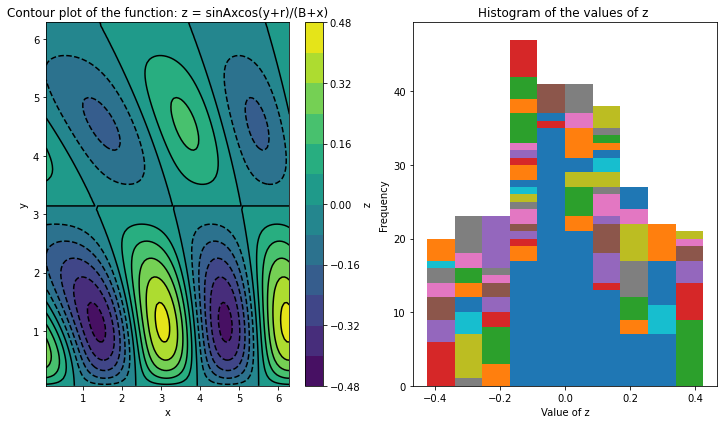

In [2]:

#import libraries
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

#function definition
def func(N, a, b, A ,B):
    x = np.linspace(a, b, N+1)
    x = np.delete(x,0)
    y = x
    z = np.zeros(shape=(N,N))
    
    for i in range(0, N):
        for j in range(0, N):
            r = np.sqrt(x[i]**2 + y[j]**2)
            z[i][j] = (np.sin(A * x[i]) * np.cos(y[j] + r))/(B + x[i])  
            
    return x, y,z
            
#function call for a=0, b= 2pi, N=100, A =1, B =1
x, y, z = func(100, 0, 2*np.pi, 1, 1)

#color map and contour plot on left side panel  
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.contourf(x, y, z, 10)
color_bar = plt.colorbar()
color_bar.set_label('z', rotation=270, labelpad=10)
plt.contour(x, y, z, 10, colors='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour plot of the function: z = sinAxcos(y+r)/(B+x)')
plt.tight_layout()

#plot histogram on right side panel
plt.subplot(1, 2, 2)
plt.hist(z, histtype='stepfilled')
plt.title('Histogram of the values of z ')
plt.xlabel('Value of z')
plt.ylabel('Frequency')
plt.tight_layout()

#Mean value of z(x, y) where a=0, b= 2pi, N=100, A =1,B=1
print('')
print('Mean of the function z(x,y) for the values : a = 0, b = 2pi, N = 100, A = 1, B = 1 is {:.4E}'.format(np.mean(z)))
print('')


In [3]:
# Test the code is working for B = 0,1,2
print('')
print('Mean value of z for varying B are :')
#function call for a=0, b= 2pi, N=100, A =1, varying B = 0,1,2
for B in range(0,3):
    x, y, z = func(100, 0, 2*np.pi, 1, B)
    print('')
    print('Mean of the function z(x,y) for the values : a = 0, b = 2pi, N = 100, A = 1,B = {} is {:.4E}'.format(B,np.mean(z)))
    print('Sum of z values: {}'.format(np.sum(z)))
print('')


Mean value of z for varying B are :

Mean of the function z(x,y) for the values : a = 0, b = 2pi, N = 100, A = 1,B = 0 is -2.8958E-02
Sum of z values: -289.58434630332187

Mean of the function z(x,y) for the values : a = 0, b = 2pi, N = 100, A = 1,B = 1 is -1.9758E-02
Sum of z values: -197.58373929550143

Mean of the function z(x,y) for the values : a = 0, b = 2pi, N = 100, A = 1,B = 2 is -1.5544E-02
Sum of z values: -155.44047743660184



Note : The code is working for the varying values of B = 0, 1, 2. By analysing the mean value of z for varying B(keeping other arguments a,b, N, A as constant), we found that the z is changing. In the function, z and B are inversely proportional. 

### Problem 3 (OPTIONAL, 10 marks): Using Runge-Kutta method to integrate an ODE

In Section 9 of the course we learned how to integrate Ordinary Differential Equations. Use the examples given in Sec09_ODEs_2021_Updated where we integrate a particle orbit around the Earth. This time,

* The initial conditions are $x_0 = -5\times 10^{8}$ m, $y_0 = 0$, $v_{x0} = 0$, $v_{y0} = -300$.

* The equation for the force is now slightly different:

$$F_g = -\frac{G m_1 (1 + \sqrt{r/r_0})}{r^2} m_2 \mathbf{\hat{r}}\;\;,$$

where $m_1$ is the mass of the Earth, and $r_0 = 4\times 10^8$ m. 

Integrate the orbit for $10^7$ seconds using the Runge-Kutta method with $10^5$ points. Plot the orbit. 



Problem 3

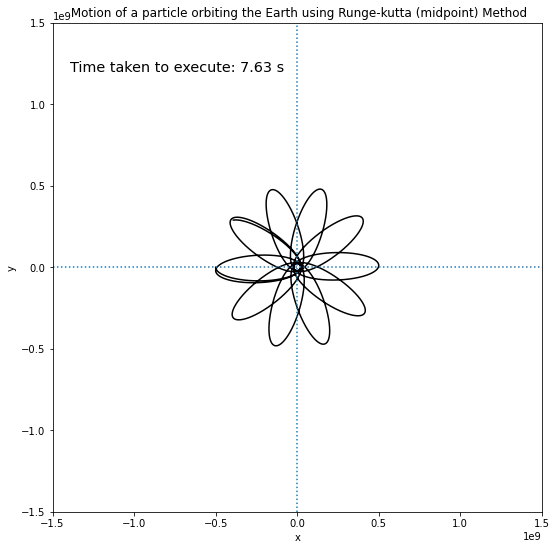

In [4]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import time

    
# This function advances the solution by one timestep using the 
# second-order Runge-Kutta Method:
# u is the system state (variables giving position, speed etc.)
# h is the timestep
# p gives system parameters    
def runkut2(u, h, p):
    """Iterates the state of motion by timestep
        using the second-order Runge-Kutta Method"""
    x, vx, y, vy = u
    G, m = p

# Compute the acceleration due to a point-like body's gravity on a test particle    
    r = np.array([x, y])
    r0 = 4E8
    d = np.sqrt(np.sum(r**2))
    ag = -G*m*r*(1+(np.sqrt(d/r0)))/d**3      #function given in the question     
    
# Compute the rates of change of the velocity and position 
# components from the values at the start of the interval
    k1x = vx*h
    k1y = vy*h
    k1vx = ag[0]*h  
    k1vy = ag[1]*h
    
# Use these to compute the position at the mid-point of the interval and
# compute the acceleration due to a point-like body's gravity on a test particle    
    rmid = np.array([x + 0.5*k1x, y + 0.5*k1y])
    dmid = np.sqrt(np.sum(rmid**2))
    ag = -G*m*rmid*(1+(np.sqrt(dmid/r0)))/dmid**3
    
# Compute the rates of change of the velocity and position 
# components from the values at the mid-point of the interval
    k2x = (vx + 0.5*k1vx)*h
    k2y = (vy + 0.5*k1vy)*h
    k2vx = ag[0]*h  
    k2vy = ag[1]*h

# Calculate the final position and velocity values     
    x1 = x + k2x
    y1 = y + k2y
    vx1 = vx + k2vx
    vy1 = vy + k2vy
    
# Pack the result in a tuple and return    
    res = (x1, vx1, y1, vy1)
    return res
    
# This function calculates the solution over the whole domain between t0 and t1 with a 
# given timestep h

def numsol(u, t0, t1, h, p):
    """Repeatedly calls the numerical solver to cover the 
       entire solution domain, and returns the state of motion
       as a Numpy RecArray"""
    
# Create abscissa array
    nt = int((t1 - t0)/ h)
    tarr = np.linspace(t0,t1,int(nt))
    
# Create an empty (zeroed) Recarray of length nt to store the four variables of motion   
    dm = np.zeros(int(nt))
    soln = np.rec.fromarrays((dm, dm, dm, dm),
            dtype=[('x', 'f8'), ('vx', 'f8'),('y', 'f8'), ('vy', 'f8')])

# Repeatedly call the numerical solver at each timestep and store the result in soln
    for i, t in enumerate(tarr):
        u = runkut2(u, h, p)
        soln[i] = u       
    return soln

# Execution starts here!  Get the system clock time at the start of execution.
start = time.time()

# Define some constants that comprise the system parameters
G = 6.67384E-11 #Newton's constant of Universal Gravitation
m = 6E24        #Mass of the Earth in kg

# Define the initial conditions in m and ms^-1
x0 = -5E8 # given in the question
y0 = 0. # given in the question
vx0 = 0. # given in the question
vy0 = -300 # given in the question

params = [G, m]
init = [x0, vx0, y0, vy0]

# Define solution domain and timestep
n = 1E5  # given in the question
t0 = 0.
tend = 1E7 # given in the question
h = (tend - t0)/n

# Compute the solution
u = numsol(init, t0, tend, h, params)

# Get the system clock time at the end of execution of solver.
end = time.time()


# Plot
f = plt.figure(figsize=(9,9))
ax = plt.subplot(111)
ax.plot(u.x, u.y, 'k')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(' Motion of a particle orbiting the Earth using Runge-kutta (midpoint) Method')
ax.set_ylim([-1.5E9,1.5E9])
ax.set_xlim([-1.5E9,1.5E9])
ax.axvline(0,ls=':')
ax.axhline(0,ls=':')
ax.set_aspect('equal')
ax.text(0.035,0.9,'Time taken to execute: {:.2f} s'.format(end - start),transform=ax.transAxes, size='x-large')
plt.draw()
plt.show()